In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import missingno as ms
import mplcyberpunk
plt.style.use("cyberpunk")

C:\Users\waviv\AppData\Local\Temp\ipykernel_30676\1070740346.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
df = pd.read_csv("data/csv/aceh_production_data_daily_ed.csv", parse_dates=True)

In [3]:
df = df.sort_values(by=["DATEPRD"]).reset_index().drop(columns=['index'])

In [4]:
df

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0      2007-09-01        Well-N2            NaN                    NaN   
1      2007-09-01        Well-W2            NaN                    NaN   
2      2007-09-02        Well-W2            NaN                    NaN   
3      2007-09-02        Well-N2            NaN                    NaN   
4      2007-09-03        Well-W2            NaN                    NaN   
...           ...            ...            ...                    ...   
15629  2016-10-05        Well-W2            NaN                    NaN   
15630  2016-10-06        Well-W2            NaN                    NaN   
15631  2016-10-07        Well-W2            NaN                    NaN   
15632  2016-11-01        Well-W2            NaN                    NaN   
15633  2016-12-01        Well-W2            NaN                    NaN   

       AVG_DP_TUBING  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0                NaN        NaN        NaN            NaN           NaN   
1                NaN        NaN        NaN            NaN           NaN   
2                NaN        NaN        NaN            NaN           NaN   
3                NaN        NaN        NaN            NaN           NaN   
4                NaN        NaN        NaN            NaN           NaN   
...              ...        ...        ...            ...           ...   
15629            NaN        NaN        NaN            NaN           NaN   
15630            NaN        NaN        NaN            NaN           NaN   
15631            NaN        NaN        NaN            NaN           NaN   
15632            NaN        NaN        NaN            NaN           NaN   
15633            NaN        NaN        NaN            NaN           NaN   

       BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  FLOW_KIND  
0               NaN           NaN          NaN  injection  
1               NaN           NaN          NaN  injection  
2               NaN           NaN          NaN  injection  
3               NaN           NaN          NaN  injection  
4               NaN           NaN          NaN  injection  
...             ...           ...          ...        ...  
15629           NaN           NaN          NaN  injection  
15630           NaN           NaN          NaN  injection  
15631           NaN           NaN          NaN  injection  
15632           NaN           NaN          NaN  injection  
15633           NaN           NaN          NaN  injection  

[15634 rows x 13 columns]

In [5]:
df["WELL_BORE_CODE"].unique()

array(['Well-N2', 'Well-W2', 'Well-W1', 'Well-C1', 'Well-N1', 'Well-S1',
       'Well-E1'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATEPRD                15634 non-null  object 
 1   WELL_BORE_CODE         15634 non-null  object 
 2   ON_STREAM_HRS          15349 non-null  float64
 3   AVG_DOWNHOLE_PRESSURE  8980 non-null   float64
 4   AVG_DP_TUBING          8980 non-null   float64
 5   AVG_WHP_P              9155 non-null   float64
 6   AVG_WHT_P              9146 non-null   float64
 7   DP_CHOKE_SIZE          15340 non-null  float64
 8   BORE_OIL_VOL           9161 non-null   float64
 9   BORE_GAS_VOL           9161 non-null   float64
 10  BORE_WAT_VOL           9161 non-null   float64
 11  BORE_WI_VOL            5706 non-null   float64
 12  FLOW_KIND              15634 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


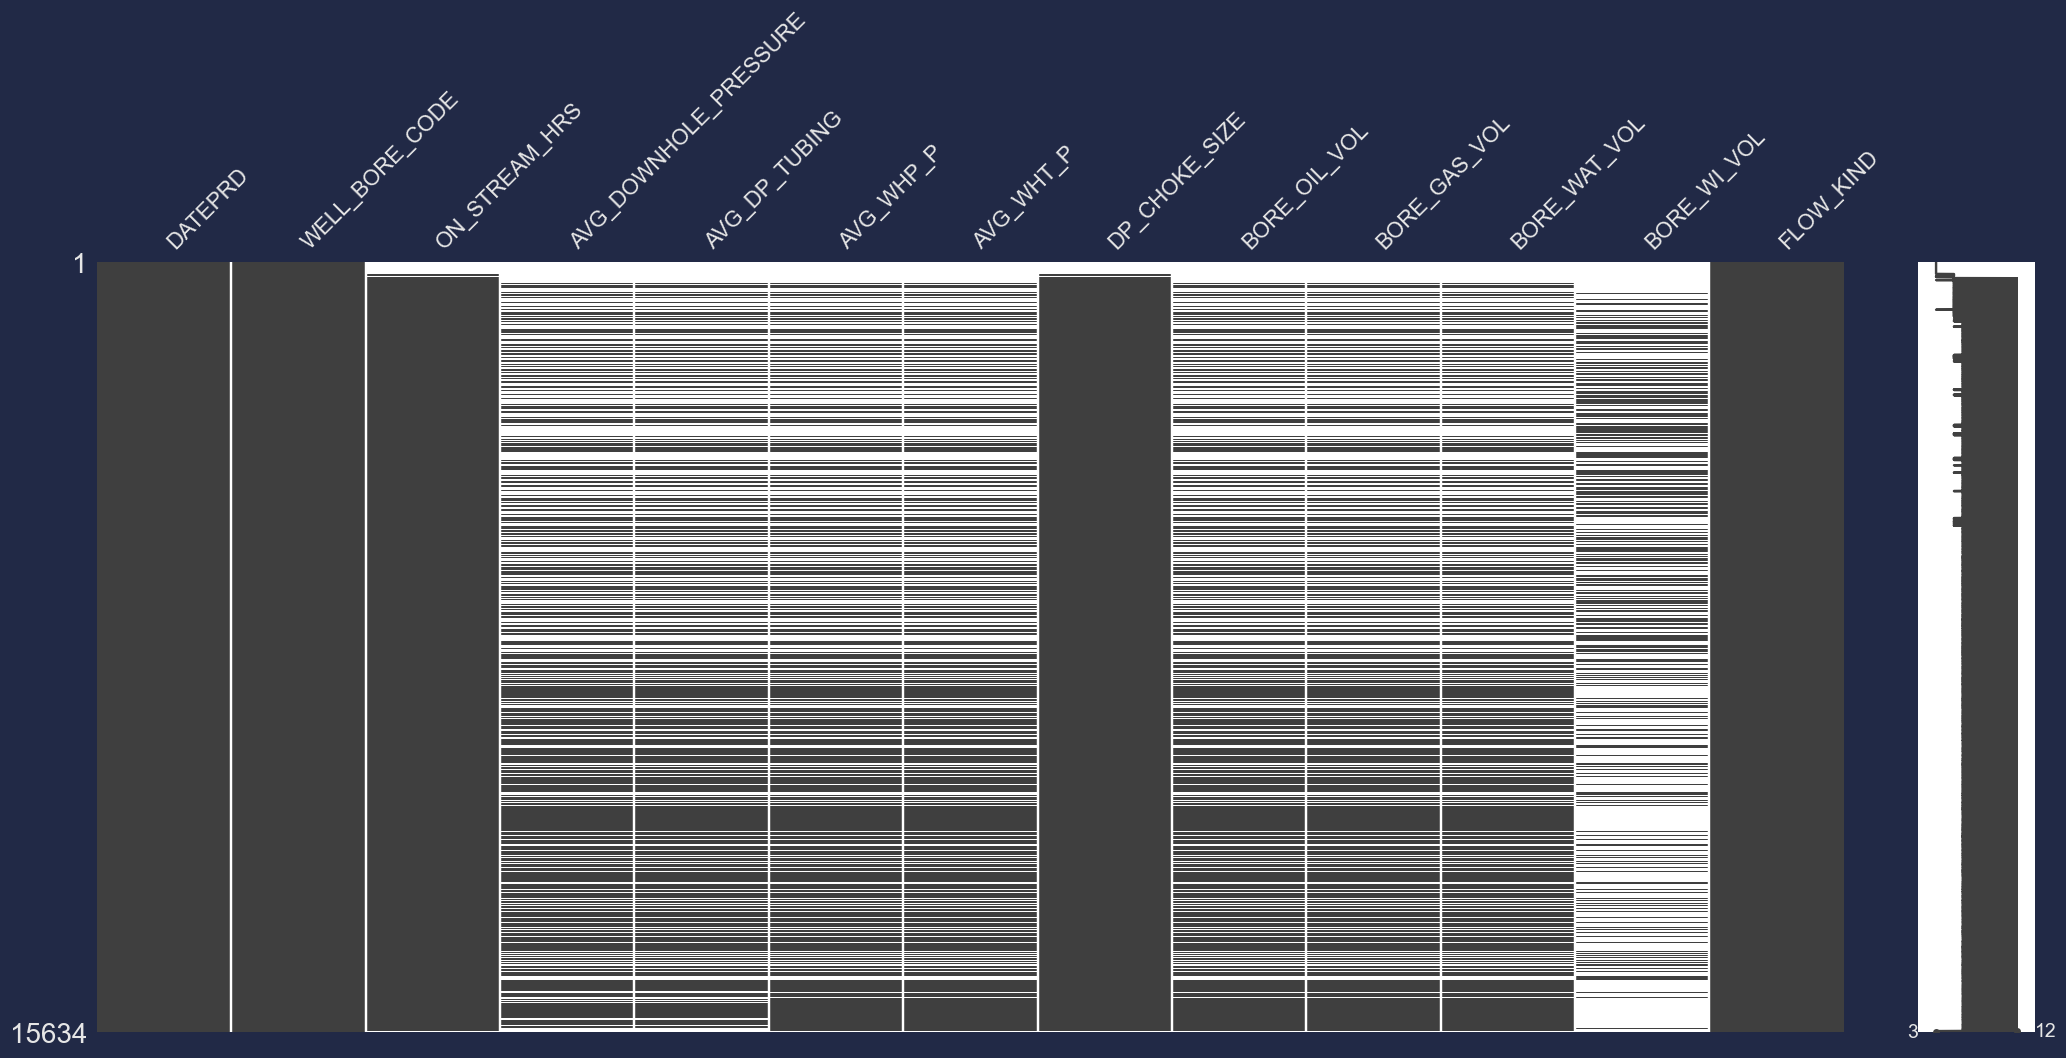

In [7]:
ms.matrix(df);

In [8]:
df.describe()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DP_TUBING    AVG_WHP_P  \
count   15349.000000            8980.000000    8980.000000  9155.000000   
mean       19.994093             181.803869     154.028787    45.377811   
std         8.369978             109.712363      76.752373    24.752631   
min         0.000000               0.000000       0.000000     0.000000   
25%        24.000000               0.000000      83.665361    31.148062   
50%        24.000000             232.896939     175.588861    37.933620   
75%        24.000000             255.401455     204.319964    57.101268   
max        25.000000             397.588550     345.906770   137.311030   

         AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  \
count  9146.000000   15340.000000   9161.000000    9161.000000   9161.000000   
mean     67.728440      11.441060   1095.631548  161049.059703   1672.151332   
std      27.719028      19.816928   1323.538151  188136.410434   1706.982853   
min       0.000000       0.000000      0.000000       0.000000   -457.840000   
25%      56.577834       0.000000    190.690000   29430.590000     19.870000   
50%      80.071250       2.384969    557.550000   87749.660000   1097.790000   
75%      88.062202      13.765020   1345.200000  202482.300000   3260.950000   
max      93.509584     125.718570   5901.840000  851131.520000   8019.740000   

        BORE_WI_VOL  
count   5706.000000  
mean    5315.480815  
std     2181.486695  
min        0.000000  
25%     4338.204674  
50%     5504.739769  
75%     6781.058040  
max    10013.600000

In [9]:
df.isna().sum()

DATEPRD                     0
WELL_BORE_CODE              0
ON_STREAM_HRS             285
AVG_DOWNHOLE_PRESSURE    6654
AVG_DP_TUBING            6654
AVG_WHP_P                6479
AVG_WHT_P                6488
DP_CHOKE_SIZE             294
BORE_OIL_VOL             6473
BORE_GAS_VOL             6473
BORE_WAT_VOL             6473
BORE_WI_VOL              9928
FLOW_KIND                   0
dtype: int64

# Data Preprocessing & Data Cleaning, EDA

In [10]:
# see all the oil production from all well

import plotly.express as px

wellwell = ["Well-N1", "Well-C1", "Well-E1", "Well-W1", "Well-S1"]

well_df = df[df["WELL_BORE_CODE"].isin(wellwell)]

fig = px.line(
        df,
        x='DATEPRD',
        y=['BORE_OIL_VOL'],
        color='WELL_BORE_CODE',
        labels={
            "value":"Production (m3)",
            "DATEPRD": "Year",
        }
    )
fig.show()

Try for Well-C1

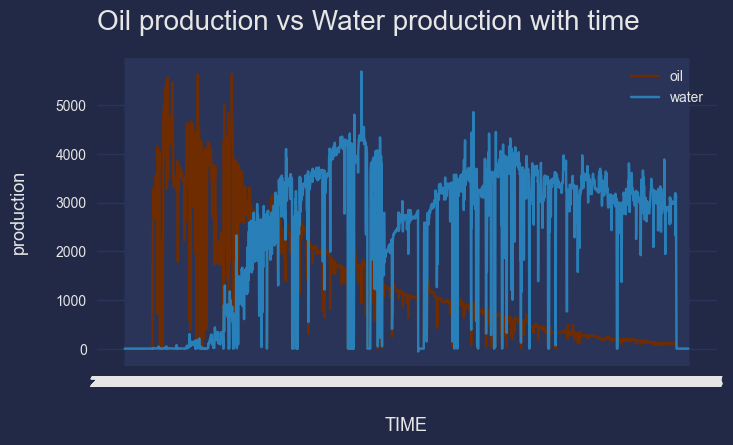

In [11]:
# EDA

# ['Well-N2', 'Well-W2', 'Well-C1', 'Well-W1', 'Well-N1', 'Well-S1', 'Well-E1']
df_well_c1 = df[df["WELL_BORE_CODE"] == "Well-C1"]

# main figure object
plt.figure(figsize= (8,4))
# make scatter plot between oil and gas production
plt.plot( df_well_c1["DATEPRD"], df_well_c1["BORE_OIL_VOL"],color="#6E2C00",label="oil") 
plt.plot(df_well_c1["DATEPRD"], df_well_c1["BORE_WAT_VOL"],color="#2980B9",label="water");

# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20)
plt.ylabel("production", fontsize= 13, labelpad = 20,loc="center")

# setting figure title 
plt.title("Oil production vs Water production with time ", fontsize= 20, pad = 20,loc="left")

plt.legend();

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_OIL_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["BORE_OIL_VOL"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=False
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_WAT_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["BORE_WAT_VOL"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=False
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Volume (m3)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Volume Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

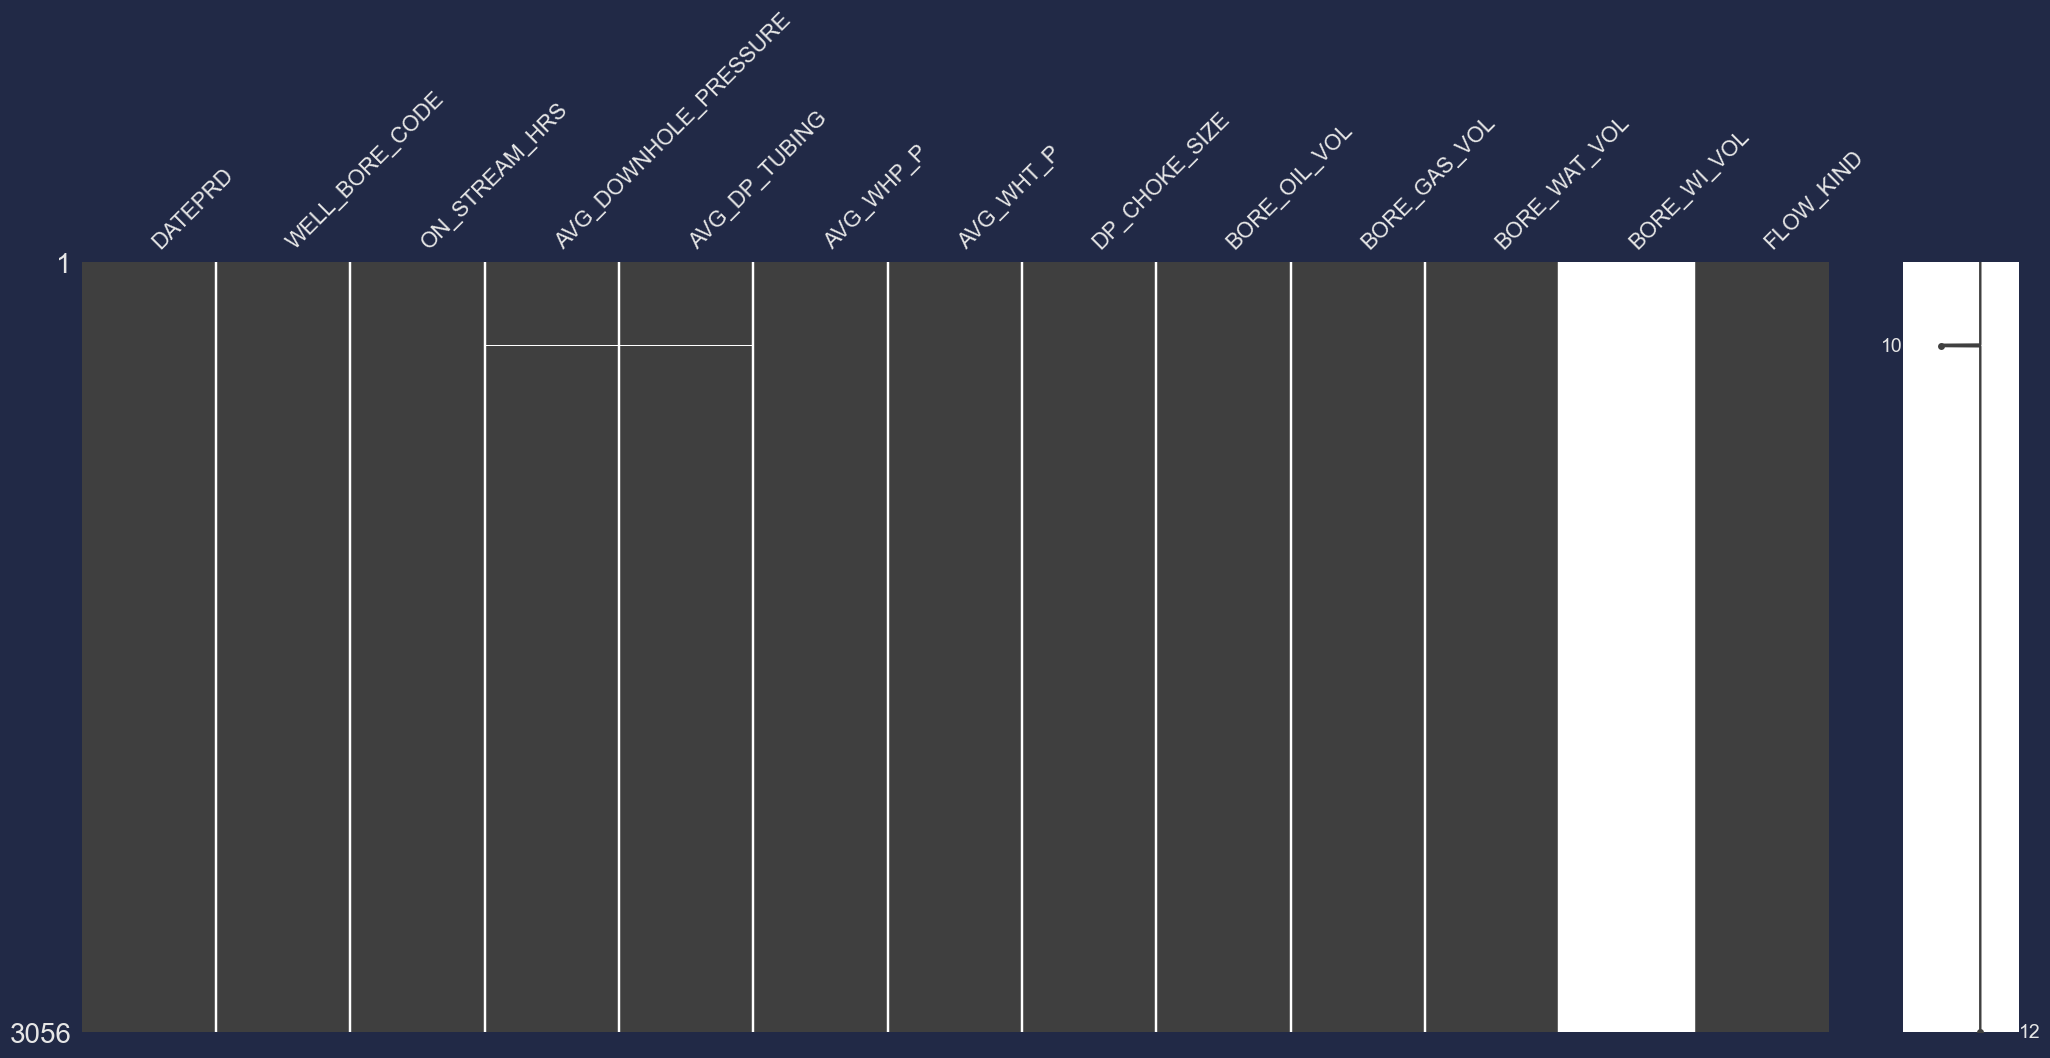

In [13]:
ms.matrix(df_well_c1);

In [14]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3056 entries, 330 to 15605
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATEPRD                3056 non-null   object 
 1   WELL_BORE_CODE         3056 non-null   object 
 2   ON_STREAM_HRS          3056 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE  3050 non-null   float64
 4   AVG_DP_TUBING          3050 non-null   float64
 5   AVG_WHP_P              3056 non-null   float64
 6   AVG_WHT_P              3056 non-null   float64
 7   DP_CHOKE_SIZE          3056 non-null   float64
 8   BORE_OIL_VOL           3056 non-null   float64
 9   BORE_GAS_VOL           3056 non-null   float64
 10  BORE_WAT_VOL           3056 non-null   float64
 11  BORE_WI_VOL            0 non-null      float64
 12  FLOW_KIND              3056 non-null   object 
dtypes: float64(10), object(3)
memory usage: 334.2+ KB


In [15]:
df_well_c1.describe() 

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DP_TUBING    AVG_WHP_P  \
count    3056.000000            3050.000000    3050.000000  3056.000000   
mean       20.541124             233.074650     192.653083    41.530600   
std         7.881214              64.923764      57.736985    22.719568   
min         0.000000               0.000000       0.000000     0.000000   
25%        24.000000             237.493045     180.749433    31.020474   
50%        24.000000             246.776063     204.247625    33.545751   
75%        24.000000             261.970976     229.632848    49.080514   
max        25.000000             334.656140     302.109760   125.718570   

         AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  \
count  3056.000000    3056.000000   3056.000000    3056.000000   3056.000000   
mean     77.103031      15.435757   1289.997837  189139.248043   2330.251878   
std      25.615703      19.965154   1298.358922  184204.114106   1462.934595   
min       0.000000       0.000000      0.000000       0.000000    -59.190000   
25%      81.223317       2.665658    209.862500   31304.035000    695.592500   
50%      86.963304       7.177533    880.785000  142362.865000   2965.715000   
75%      88.538931      21.173839   2033.697500  305327.862500   3444.147500   
max      93.509584     125.718570   5644.370000  789974.730000   5691.770000   

       BORE_WI_VOL  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

In [16]:
df_well_c1 = df_well_c1.drop(columns="BORE_WI_VOL")
df_well_c1

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
330    2008-02-12        Well-C1            0.0                    0.0   
334    2008-02-13        Well-C1            0.0                    0.0   
339    2008-02-14        Well-C1            0.0                    0.0   
341    2008-02-15        Well-C1            0.0                    0.0   
344    2008-02-16        Well-C1            0.0                    0.0   
...           ...            ...            ...                    ...   
15584  2016-09-13        Well-C1            0.0                    0.0   
15588  2016-09-14        Well-C1            0.0                    0.0   
15594  2016-09-15        Well-C1            0.0                    0.0   
15602  2016-09-16        Well-C1            0.0                    0.0   
15605  2016-09-17        Well-C1            0.0                    0.0   

       AVG_DP_TUBING  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
330          0.00000    0.00000        0.0        0.05885           0.0   
334          0.00000    0.00000        0.0        0.06768           0.0   
339          0.00000    0.00000        0.0        0.04950           0.0   
341          0.00000    0.00000        0.0        0.06640           0.0   
344          0.00000    0.00000        0.0        0.10479           0.0   
...              ...        ...        ...            ...           ...   
15584       10.87335   10.87335        0.0        8.89437           0.0   
15588       10.87699   10.87699        0.0        8.88767           0.0   
15594       10.88277   10.88277        0.0        8.85606           0.0   
15602       10.87889   10.87889        0.0        8.83878           0.0   
15605       10.87613   10.87613        0.0        8.82793           0.0   

       BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND  
330             0.0           0.0  production  
334             0.0           0.0  production  
339             0.0           0.0  production  
341             0.0           0.0  production  
344             0.0           0.0  production  
...             ...           ...         ...  
15584           0.0           0.0  production  
15588           0.0           0.0  production  
15594           0.0           0.0  production  
15602           0.0           0.0  production  
15605           0.0           0.0  production  

[3056 rows x 12 columns]

In [17]:
df_well_c1.isnull().sum()

DATEPRD                  0
WELL_BORE_CODE           0
ON_STREAM_HRS            0
AVG_DOWNHOLE_PRESSURE    6
AVG_DP_TUBING            6
AVG_WHP_P                0
AVG_WHT_P                0
DP_CHOKE_SIZE            0
BORE_OIL_VOL             0
BORE_GAS_VOL             0
BORE_WAT_VOL             0
FLOW_KIND                0
dtype: int64

In [18]:
df_well_c1 = df_well_c1[df_well_c1["ON_STREAM_HRS"] > 0]

df_well_c1["oil_rate"] = df_well_c1["BORE_OIL_VOL"] / df_well_c1["ON_STREAM_HRS"]
df_well_c1["water_rate"] = df_well_c1["BORE_WAT_VOL"] / df_well_c1["ON_STREAM_HRS"]

df_well_c1

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
936    2008-07-13        Well-C1       24.00000             260.866875   
939    2008-07-14        Well-C1        5.57000             256.248230   
943    2008-07-15        Well-C1       24.00000             254.982785   
946    2008-07-16        Well-C1       24.00000             251.475921   
951    2008-07-17        Well-C1       24.00000             249.346191   
...           ...            ...            ...                    ...   
15186  2016-07-09        Well-C1       22.66666             268.812764   
15194  2016-07-10        Well-C1       24.00000             265.922630   
15197  2016-07-11        Well-C1       23.66667             267.768521   
15205  2016-07-12        Well-C1       24.00000             266.002483   
15212  2016-07-13        Well-C1       14.89167             266.388898   

       AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
936       160.151955  100.714919  52.381899      69.539413       1735.26   
939       156.649912   99.598318  71.115352      68.016167        592.36   
943       156.332844   98.649941  67.590753      66.948884       2532.21   
946       155.817187   95.658734  73.782251      63.663812       3030.71   
951       155.760939   93.585252  78.035440      61.337700       3288.08   
...              ...         ...        ...            ...           ...   
15186     239.081167   29.731597  87.864056       4.114340        102.09   
15194     238.398367   27.524263  89.153704       1.959482        113.38   
15197     238.638669   29.129852  89.074774       3.407768        108.84   
15205     238.273904   27.728579  89.503524       1.938210        113.84   
15212     238.257230   28.131667  89.354794       2.536683         68.47   

       BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND    oil_rate  water_rate  
936       252235.23          4.00  production   72.302500    0.166667  
939        88949.00          1.37  production  106.348294    0.245961  
943       373786.28          5.84  production  105.508750    0.243333  
946       447840.09          9.13  production  126.279583    0.380417  
951       474614.43          7.58  production  137.003333    0.315833  
...             ...           ...         ...         ...         ...  
15186      16681.29       2326.24  production    4.503972  102.628265  
15194      18753.12       3185.47  production    4.724167  132.727917  
15197      17979.28       3056.29  production    4.598873  129.138996  
15205      18543.76       3148.91  production    4.743333  131.204583  
15212      10591.65       1907.46  production    4.597873  128.089059  

[2724 rows x 14 columns]

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_OIL_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_WAT_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Rate Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

In [20]:
# figure out how can that be a negative in water rate
# dataset.loc[1367, "categori"] = "BAIK"
# dataset[dataset["max"] == "PM25"]

df_well_c1[df_well_c1["water_rate"] < 0]

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
1864  2009-03-03        Well-C1         24.000             270.291285   
6798  2012-08-13        Well-C1          0.625             252.892348   

      AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
1864     168.305082  101.986203  79.554519      68.800869       4339.13   
6798     206.739802   46.152546  83.714672      17.203700        202.53   

      BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND    oil_rate  water_rate  
1864     616094.56         -0.95  production  180.797083   -0.039583  
6798       3754.12        -59.19  production  324.048000  -94.704000

In [21]:
# we can take this as an error in calculations, so we can delete this negative mark
df_well_c1.loc[1864, "BORE_WAT_VOL"] = 0.95
df_well_c1.loc[6798, "BORE_WAT_VOL"] = 59.19

In [22]:
# recalculate the oil and water rate

df_well_c1 = df_well_c1[df_well_c1["ON_STREAM_HRS"] > 0]

df_well_c1["oil_rate"] = df_well_c1["BORE_OIL_VOL"] / df_well_c1["ON_STREAM_HRS"]
df_well_c1["water_rate"] = df_well_c1["BORE_WAT_VOL"] / df_well_c1["ON_STREAM_HRS"]

df_well_c1

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
936    2008-07-13        Well-C1       24.00000             260.866875   
939    2008-07-14        Well-C1        5.57000             256.248230   
943    2008-07-15        Well-C1       24.00000             254.982785   
946    2008-07-16        Well-C1       24.00000             251.475921   
951    2008-07-17        Well-C1       24.00000             249.346191   
...           ...            ...            ...                    ...   
15186  2016-07-09        Well-C1       22.66666             268.812764   
15194  2016-07-10        Well-C1       24.00000             265.922630   
15197  2016-07-11        Well-C1       23.66667             267.768521   
15205  2016-07-12        Well-C1       24.00000             266.002483   
15212  2016-07-13        Well-C1       14.89167             266.388898   

       AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
936       160.151955  100.714919  52.381899      69.539413       1735.26   
939       156.649912   99.598318  71.115352      68.016167        592.36   
943       156.332844   98.649941  67.590753      66.948884       2532.21   
946       155.817187   95.658734  73.782251      63.663812       3030.71   
951       155.760939   93.585252  78.035440      61.337700       3288.08   
...              ...         ...        ...            ...           ...   
15186     239.081167   29.731597  87.864056       4.114340        102.09   
15194     238.398367   27.524263  89.153704       1.959482        113.38   
15197     238.638669   29.129852  89.074774       3.407768        108.84   
15205     238.273904   27.728579  89.503524       1.938210        113.84   
15212     238.257230   28.131667  89.354794       2.536683         68.47   

       BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND    oil_rate  water_rate  
936       252235.23          4.00  production   72.302500    0.166667  
939        88949.00          1.37  production  106.348294    0.245961  
943       373786.28          5.84  production  105.508750    0.243333  
946       447840.09          9.13  production  126.279583    0.380417  
951       474614.43          7.58  production  137.003333    0.315833  
...             ...           ...         ...         ...         ...  
15186      16681.29       2326.24  production    4.503972  102.628265  
15194      18753.12       3185.47  production    4.724167  132.727917  
15197      17979.28       3056.29  production    4.598873  129.138996  
15205      18543.76       3148.91  production    4.743333  131.204583  
15212      10591.65       1907.46  production    4.597873  128.089059  

[2724 rows x 14 columns]

In [23]:
# recheck

df_well_c1[df_well_c1["water_rate"] < 0]

Empty DataFrame
Columns: [DATEPRD, WELL_BORE_CODE, ON_STREAM_HRS, AVG_DOWNHOLE_PRESSURE, AVG_DP_TUBING, AVG_WHP_P, AVG_WHT_P, DP_CHOKE_SIZE, BORE_OIL_VOL, BORE_GAS_VOL, BORE_WAT_VOL, FLOW_KIND, oil_rate, water_rate]
Index: []

In [24]:
# insert graph again to see

import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_OIL_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_WAT_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Rate Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

In [25]:
df_well_c1.isnull().sum()

DATEPRD                  0
WELL_BORE_CODE           0
ON_STREAM_HRS            0
AVG_DOWNHOLE_PRESSURE    6
AVG_DP_TUBING            6
AVG_WHP_P                0
AVG_WHT_P                0
DP_CHOKE_SIZE            0
BORE_OIL_VOL             0
BORE_GAS_VOL             0
BORE_WAT_VOL             0
FLOW_KIND                0
oil_rate                 0
water_rate               0
dtype: int64

In [26]:
# since the null data is only 6, we can drop them
df_well_c1.dropna()

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
936    2008-07-13        Well-C1       24.00000             260.866875   
939    2008-07-14        Well-C1        5.57000             256.248230   
943    2008-07-15        Well-C1       24.00000             254.982785   
946    2008-07-16        Well-C1       24.00000             251.475921   
951    2008-07-17        Well-C1       24.00000             249.346191   
...           ...            ...            ...                    ...   
15186  2016-07-09        Well-C1       22.66666             268.812764   
15194  2016-07-10        Well-C1       24.00000             265.922630   
15197  2016-07-11        Well-C1       23.66667             267.768521   
15205  2016-07-12        Well-C1       24.00000             266.002483   
15212  2016-07-13        Well-C1       14.89167             266.388898   

       AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
936       160.151955  100.714919  52.381899      69.539413       1735.26   
939       156.649912   99.598318  71.115352      68.016167        592.36   
943       156.332844   98.649941  67.590753      66.948884       2532.21   
946       155.817187   95.658734  73.782251      63.663812       3030.71   
951       155.760939   93.585252  78.035440      61.337700       3288.08   
...              ...         ...        ...            ...           ...   
15186     239.081167   29.731597  87.864056       4.114340        102.09   
15194     238.398367   27.524263  89.153704       1.959482        113.38   
15197     238.638669   29.129852  89.074774       3.407768        108.84   
15205     238.273904   27.728579  89.503524       1.938210        113.84   
15212     238.257230   28.131667  89.354794       2.536683         68.47   

       BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND    oil_rate  water_rate  
936       252235.23          4.00  production   72.302500    0.166667  
939        88949.00          1.37  production  106.348294    0.245961  
943       373786.28          5.84  production  105.508750    0.243333  
946       447840.09          9.13  production  126.279583    0.380417  
951       474614.43          7.58  production  137.003333    0.315833  
...             ...           ...         ...         ...         ...  
15186      16681.29       2326.24  production    4.503972  102.628265  
15194      18753.12       3185.47  production    4.724167  132.727917  
15197      17979.28       3056.29  production    4.598873  129.138996  
15205      18543.76       3148.91  production    4.743333  131.204583  
15212      10591.65       1907.46  production    4.597873  128.089059  

[2718 rows x 14 columns]

In [27]:
# we can drop the ON_STREAM_HRS, BORE_GAS_VOL, BORE_WAT_VOL for the sake of avoiding data leakage

df_well_c1 = df_well_c1.drop(columns = ["ON_STREAM_HRS", "BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL", "FLOW_KIND"])
df_well_c1.head()

DATEPRD WELL_BORE_CODE  AVG_DOWNHOLE_PRESSURE  AVG_DP_TUBING  \
936  2008-07-13        Well-C1             260.866875     160.151955   
939  2008-07-14        Well-C1             256.248230     156.649912   
943  2008-07-15        Well-C1             254.982785     156.332844   
946  2008-07-16        Well-C1             251.475921     155.817187   
951  2008-07-17        Well-C1             249.346191     155.760939   

      AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE    oil_rate  water_rate  
936  100.714919  52.381899      69.539413   72.302500    0.166667  
939   99.598318  71.115352      68.016167  106.348294    0.245961  
943   98.649941  67.590753      66.948884  105.508750    0.243333  
946   95.658734  73.782251      63.663812  126.279583    0.380417  
951   93.585252  78.035440      61.337700  137.003333    0.315833

In [28]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 936 to 15212
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATEPRD                2724 non-null   object 
 1   WELL_BORE_CODE         2724 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE  2718 non-null   float64
 3   AVG_DP_TUBING          2718 non-null   float64
 4   AVG_WHP_P              2724 non-null   float64
 5   AVG_WHT_P              2724 non-null   float64
 6   DP_CHOKE_SIZE          2724 non-null   float64
 7   oil_rate               2724 non-null   float64
 8   water_rate             2724 non-null   float64
dtypes: float64(7), object(2)
memory usage: 212.8+ KB


In [29]:
# we can see that DATEPRD is not in datetime format
df_well_c1["DATEPRD"] = df_well_c1["DATEPRD"].astype("datetime64")

In [30]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 936 to 15212
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATEPRD                2724 non-null   datetime64[ns]
 1   WELL_BORE_CODE         2724 non-null   object        
 2   AVG_DOWNHOLE_PRESSURE  2718 non-null   float64       
 3   AVG_DP_TUBING          2718 non-null   float64       
 4   AVG_WHP_P              2724 non-null   float64       
 5   AVG_WHT_P              2724 non-null   float64       
 6   DP_CHOKE_SIZE          2724 non-null   float64       
 7   oil_rate               2724 non-null   float64       
 8   water_rate             2724 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 212.8+ KB


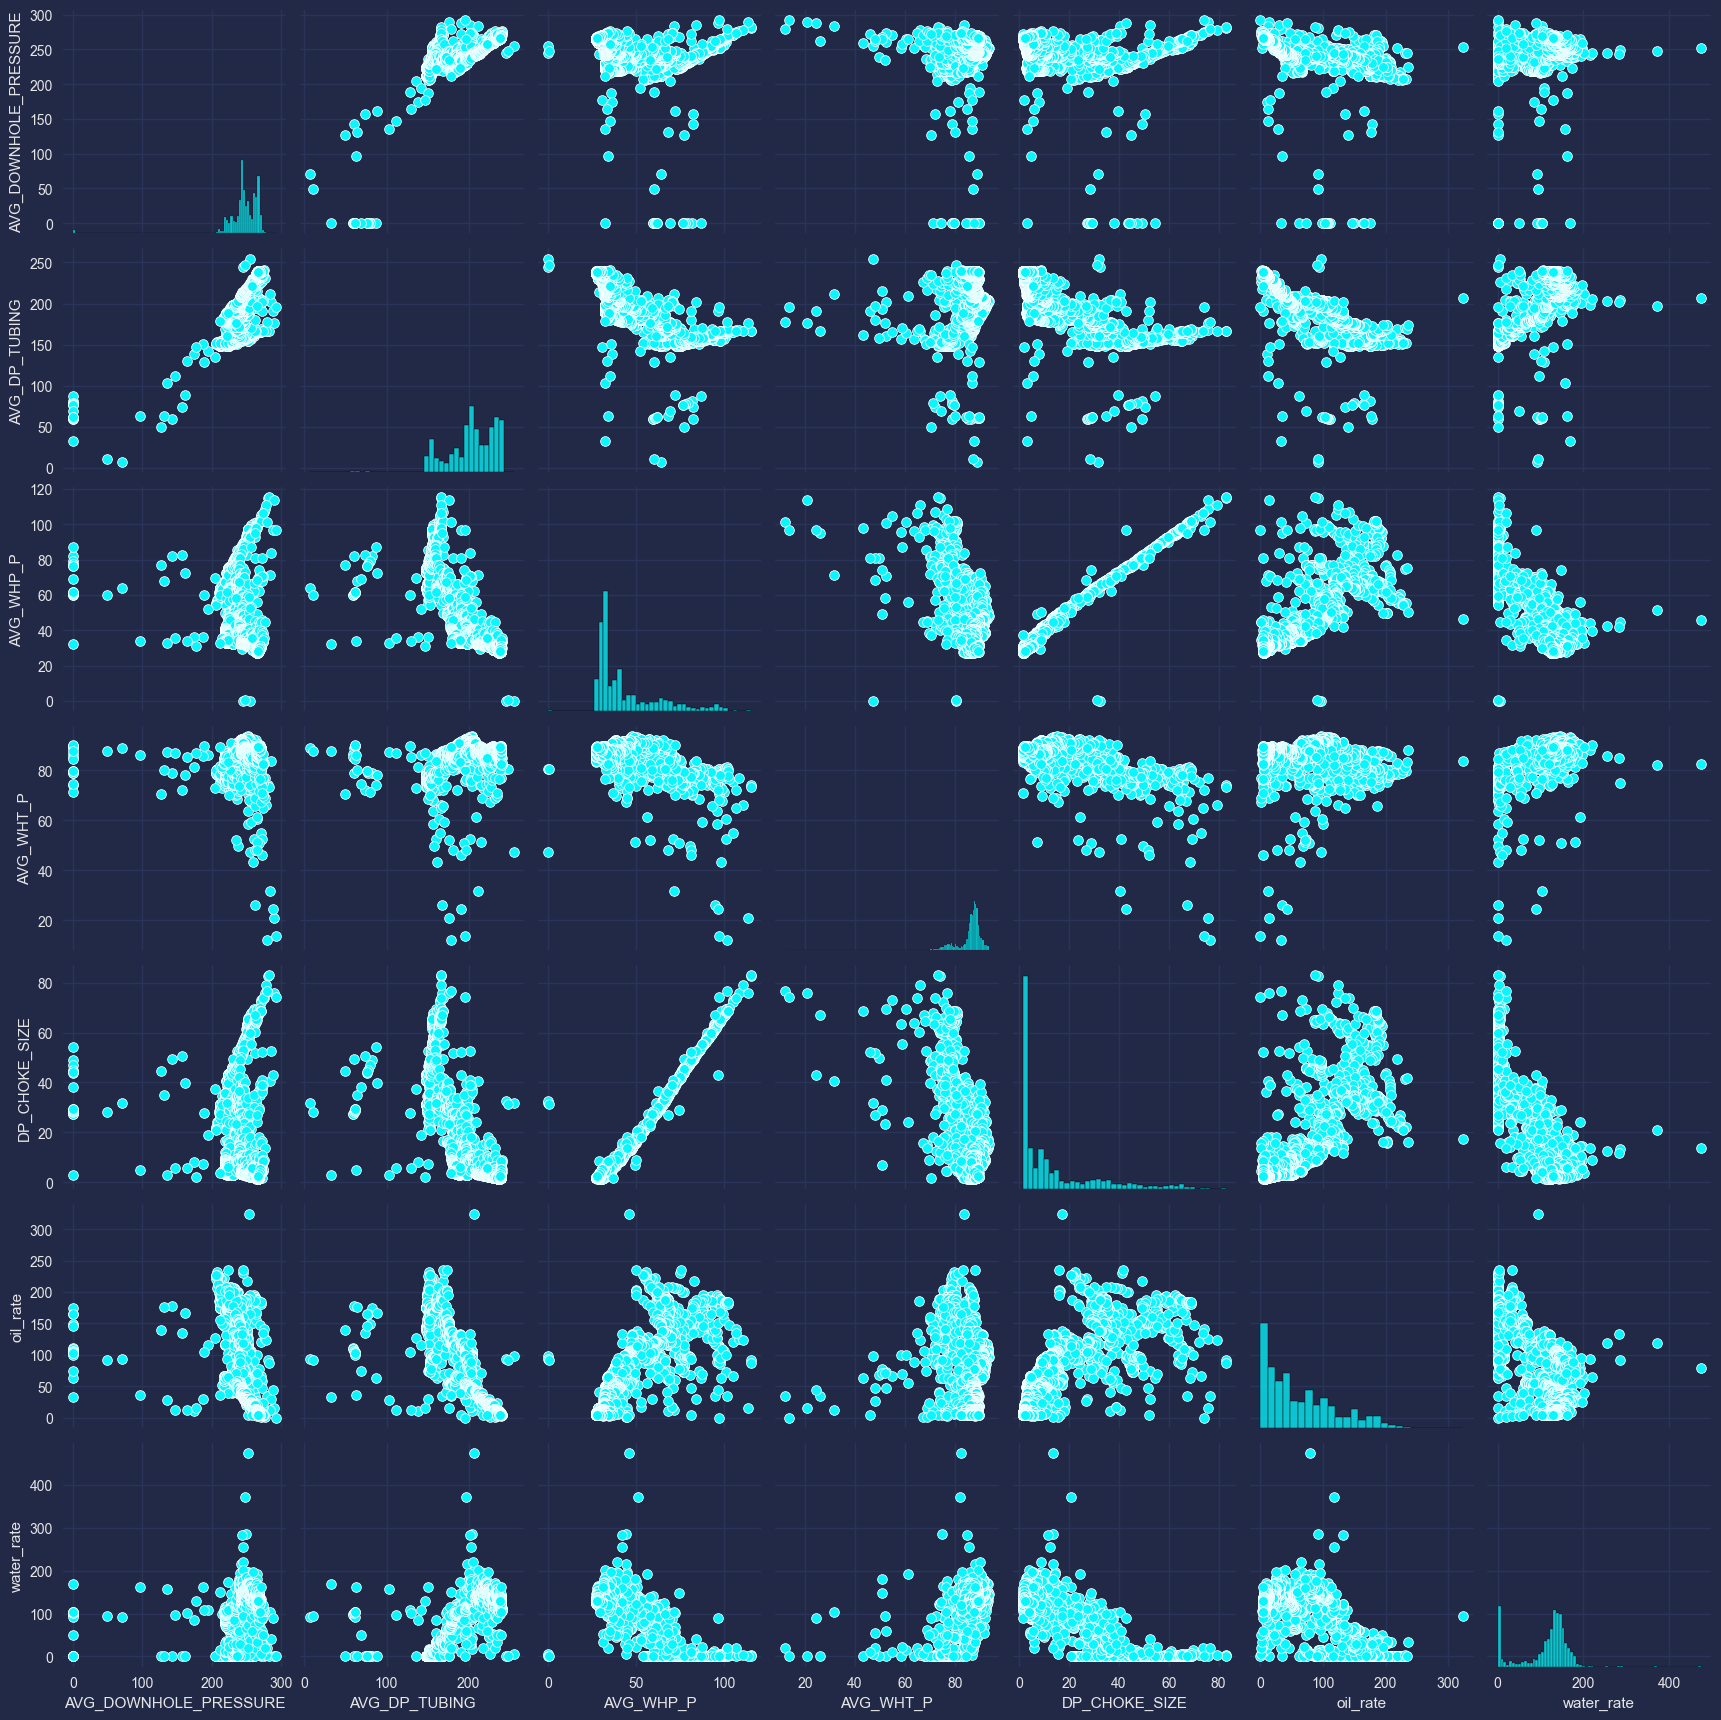

In [31]:
# have a look at all the scatter plots between all variables
sns.pairplot(df_well_c1);

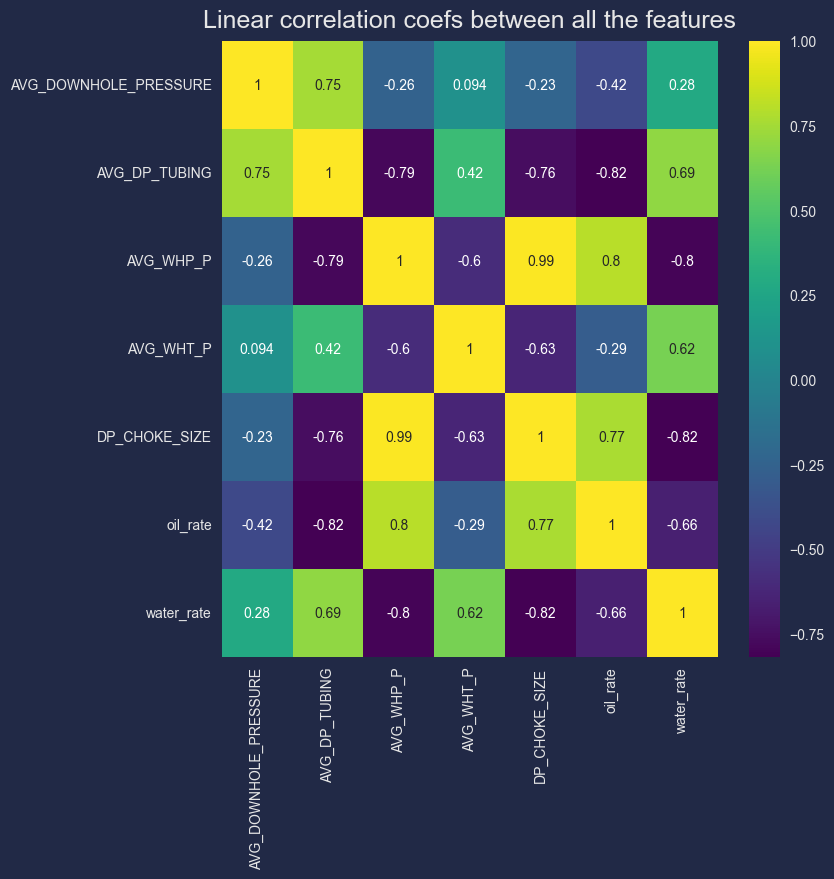

In [32]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df_well_c1.corr(), annot=True, cmap="viridis");

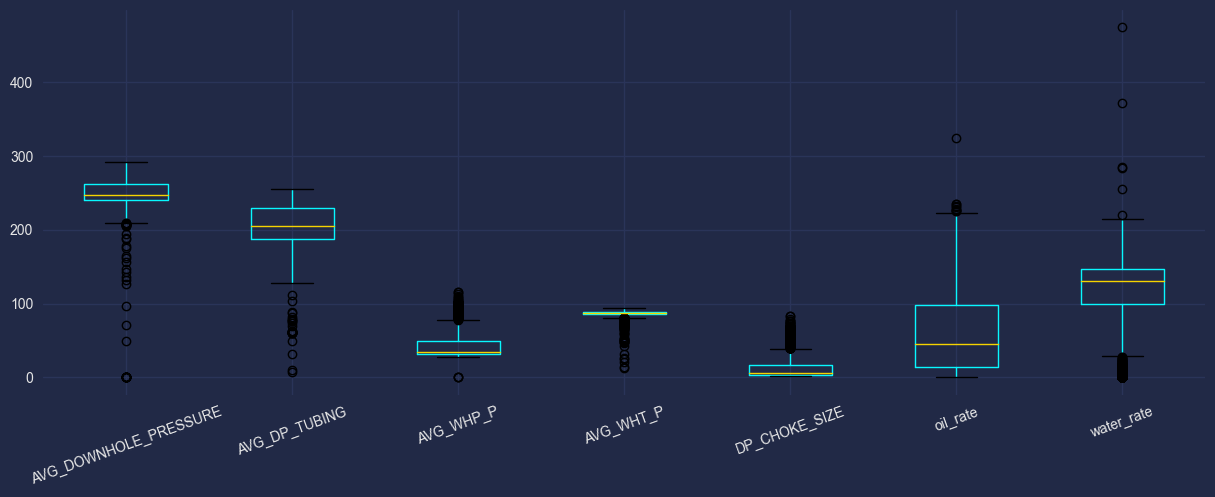

In [33]:
# show the data distribustion to see if there is outliers
plt.figure(figsize=(15,5))
df_well_c1.boxplot()
plt.xticks(rotation=20);

In [34]:
figure = make_subplots(
            rows=7, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="oil_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="water_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=2, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_PRESSURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_PRESSURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=3, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DP_TUBING",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DP_TUBING"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=4, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHP_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHP_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=5, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHT_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHT_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=6, col=1
    )

figure.add_trace(
    go.Scatter(
        name="DP_CHOKE_SIZE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["DP_CHOKE_SIZE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=7, col=1
    )

figure.update_layout(
            height=2000,
            autosize=True,  # Allow the figure to be autosized
            margin=dict(l=10, r=10, t=10, b=10),  # Adjust the margins for the figure
            legend=dict(
                x=0.75,   # Set the x position of the legend (0.5 means centered horizontally)
                y=1.0,   # Set the y position of the legend (1.0 means at the top)
                xanchor='center',  # Anchor point for the x position ('center' for center alignment)
                yanchor='top',     # Anchor point for the y position ('top' for top alignment)
                orientation='v',   # Orientation of the legend ('h' for horizontal)
                bgcolor='rgba(255, 255, 255, 0.5)',  # Background color of the legend (with transparency)
                # bordercolor='rgba(0, 0, 0, 0.5)',     # Border color of the legend (with transparency)
                # borderwidth=1       # Border width of the legend
            )
        )

figure.show()

In [35]:
# lets remove zero and some outliers

df_well_c1 = df_well_c1[df_well_c1 != 0]
df_well_c1 = df_well_c1[df_well_c1["water_rate"] < 300]

#remove as i think anomoly data in the average tuping losses 
df_well_c1 = df_well_c1[df_well_c1["AVG_DP_TUBING"] > 100]
df_well_c1 = df_well_c1[ df_well_c1["AVG_WHP_P"] >10 ]
df_well_c1.head()

DATEPRD WELL_BORE_CODE  AVG_DOWNHOLE_PRESSURE  AVG_DP_TUBING  \
936 2008-07-13        Well-C1             260.866875     160.151955   
939 2008-07-14        Well-C1             256.248230     156.649912   
943 2008-07-15        Well-C1             254.982785     156.332844   
946 2008-07-16        Well-C1             251.475921     155.817187   
951 2008-07-17        Well-C1             249.346191     155.760939   

      AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE    oil_rate  water_rate  
936  100.714919  52.381899      69.539413   72.302500    0.166667  
939   99.598318  71.115352      68.016167  106.348294    0.245961  
943   98.649941  67.590753      66.948884  105.508750    0.243333  
946   95.658734  73.782251      63.663812  126.279583    0.380417  
951   93.585252  78.035440      61.337700  137.003333    0.315833

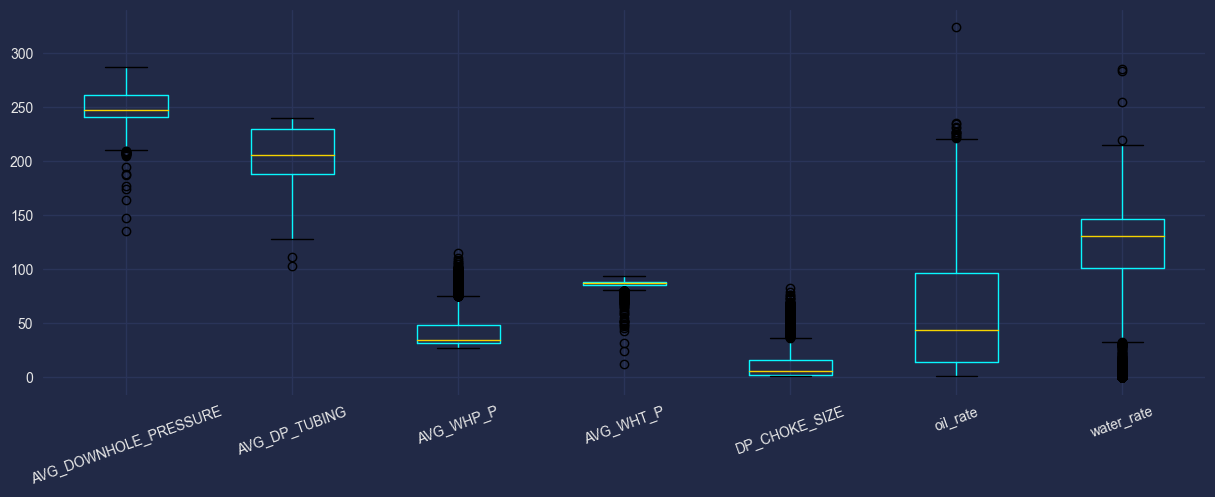

In [36]:
plt.figure(figsize=(15,5))
df_well_c1.boxplot()
plt.xticks(rotation=20);

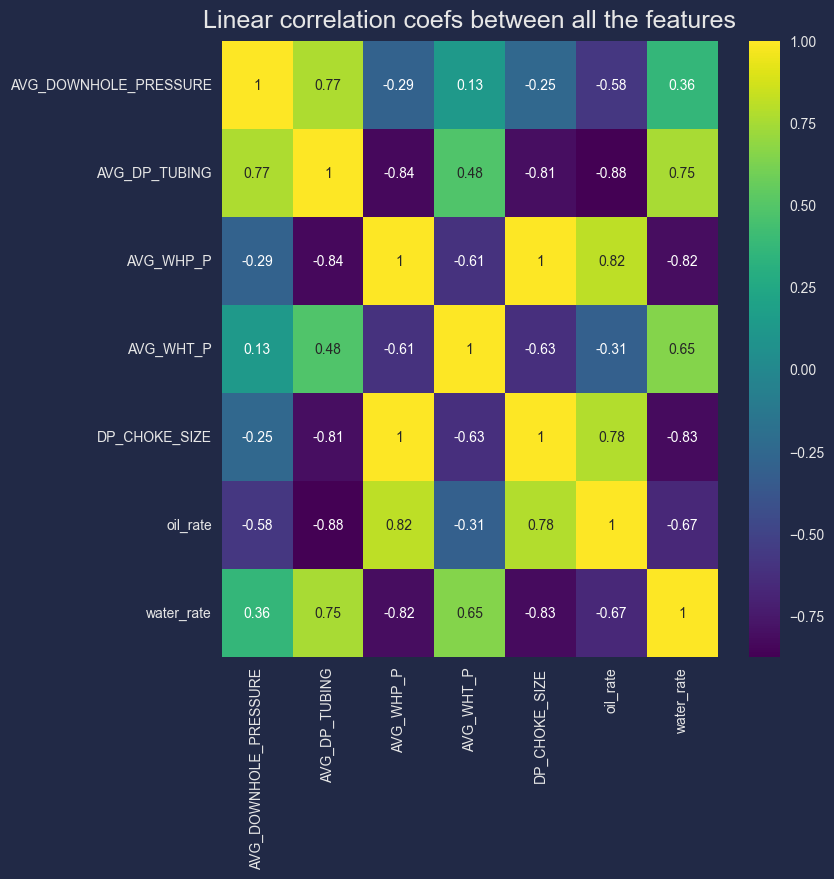

In [37]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df_well_c1.corr(), annot=True, cmap="viridis");

# Create ML Models

In [39]:
df = df_well_c1
# df
df["days"] = (df["DATEPRD"] - df["DATEPRD"].min()).dt.days

In [40]:
X = df[["days",'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING'
     ,'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE']]
y = df[['oil_rate', 'water_rate']]

# splitting the data to frecast 
train_size=  int(.8 * len(X))
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

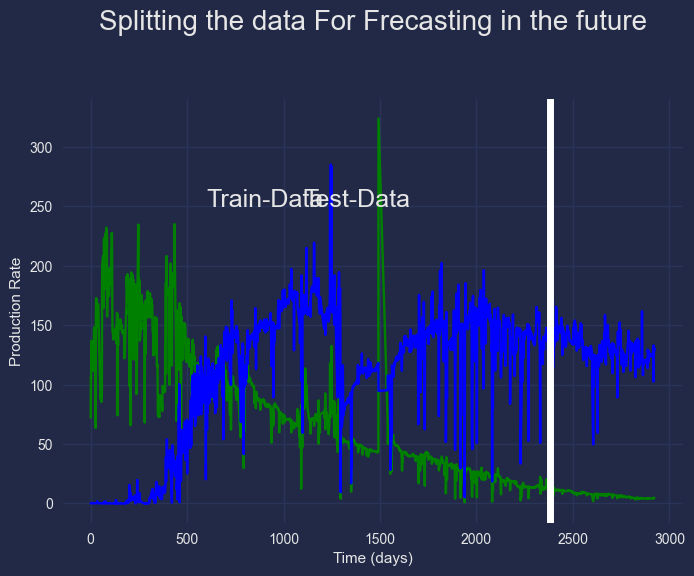

In [41]:
plt.title("Splitting the data For Frecasting in the future",fontsize=20,pad=50)
plt.plot(X_train["days"],y_train["oil_rate"],color="green")
plt.plot(X_train["days"],y_train["water_rate"],color="blue")
plt.plot(X_test["days"],y_test["oil_rate"],color="green")
plt.plot(X_test["days"],y_test["water_rate"],color="blue")
plt.xlabel("Time (days)")
plt.ylabel("Production Rate")
plt.axvline(x = X["days"].iloc[train_size], color = '#fff', label = 'axvline - full height',linewidth=5);
plt.annotate('Train-Data', xy=(600, 250), xytext=(600, 250),fontsize=18)
plt.annotate('Test-Data', xy=(600, 250),  xytext=(1100, 250),fontsize=18)
plt.show()

In [48]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression

# caclulate mean absolute error in each
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

use XGBoost Model

In [43]:
# the parameter are found after gridsearch among possible groups and found the following are the best to use
xbg = XGBRegressor(max_depth=10,n_estimators=1000,objective="reg:squarederror",gamma=.3)
xbg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
## make a function to show the model evaluationis
def eval(model):
    # get the mean absolute error
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    oil_mae = mean_absolute_error(y_test["oil_rate"],y_pred[:,0])
    oil_r2 = r2_score(y_test["oil_rate"],y_pred[:,0])
    water_mae = mean_absolute_error(y_test["water_rate"],y_pred[:,1])
    water_r2 = r2_score(y_test["water_rate"],y_pred[:,1])
    print(f" Oil MAE :{oil_mae} , R2 :{oil_r2}")
    print(f" Water MAE :{water_mae} , R2 :{water_r2}")
    
    # show the result
    plt.figure(figsize=(10,6))
    plt.title("Show model results",fontsize=20,pad=40)
    plt.plot(X_test["days"],y_pred[:,0],color="#F1C40F",label="oil_prdiction")
    plt.plot(X_test["days"],y_pred[:,1],color="#40E0D0",label="water_prediction")
    plt.plot(X_test["days"],y_test["oil_rate"],color="#D35400",label="True_oil")
    plt.plot(X_test["days"],y_test["water_rate"],color="blue",label="True-Water")
    plt.plot(X_train["days"],y_train["oil_rate"],color="#D35400")
    plt.plot(X_train["days"],y_train["water_rate"],color="blue")
    plt.axvline(x = X["days"].iloc[train_size], color = '#fff',linewidth=3, label = 'Begining of Prediciton');
    plt.legend()
    plt.show()

 Oil MAE :1.842207291069804 , R2 :-0.03674673860654831
 Water MAE :45.982721098381866 , R2 :-20.17561899378042


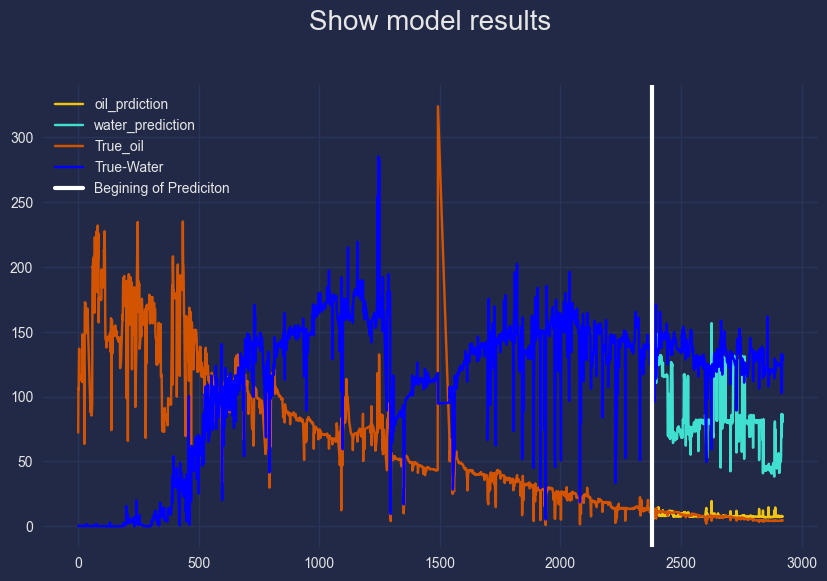

In [46]:
# evaluate the xbgboost
eval(xbg)

Use Linear Regression

 Oil MAE :28.375283765628446 , R2 :-158.87423280991604
 Water MAE :24.291076874767644 , R2 :-4.262244788327455


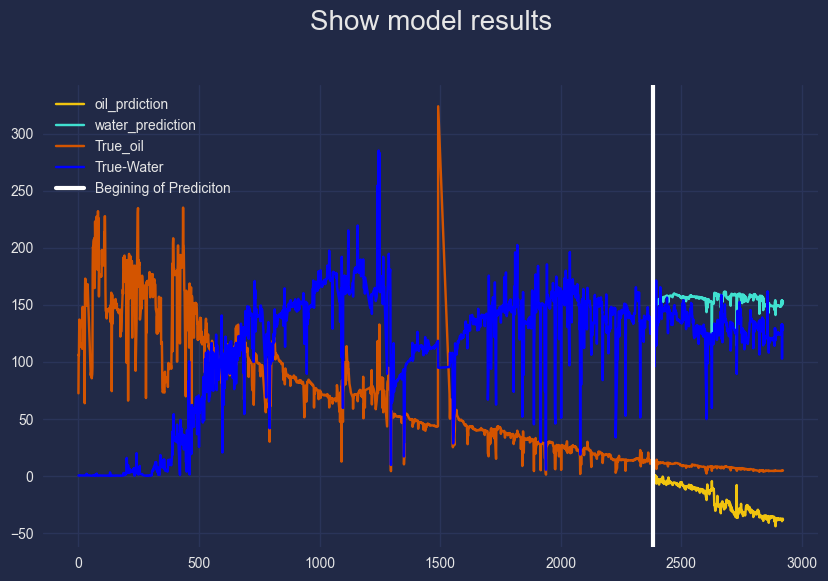

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)
eval(lr)